## Universidad Nacional de Colombia
# Minería de Datos
**Prof. Elizabeth León**

**Preprocesamiento**

---



 # 1. Carga de datos y modulos

In [1]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('../terpel_exploration/Ventas_cleaned.csv')

In [84]:
dups  =  df . duplicated () 
print ( 'Número de filas duplicadas = % d '  %  ( dups . sum ())) 

Número de filas duplicadas =  0 


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.decomposition import PCA

In [6]:
df['F_ValorAPagar__c'] = df['F_ValorAPagar__c'].str.replace('$','')
df['F_ValorAPagar__c'] = df['F_ValorAPagar__c'].str.replace('.','')
df['F_ValorAPagar__c'] = df['F_ValorAPagar__c'].str.replace(',','.')
df['F_ValorAPagar__c'] = df.F_ValorAPagar__c.astype("float")

In [7]:
df['F_ValorAPagar__GNV'] = df.TER_Venta_1_galon__c * df.Ter_CantidadTotal__c

In [8]:
df = df.loc[df['F_TipoCombustible__c'].notnull() ].copy()

In [9]:
df4 = np.array(df)

In [10]:
for i in range(0, df4.shape[0]):
    if np.isnan(df4[i,34]):
        df4[i,34] = df4[i,50]
    else:
        df4[i,34] = df4[i,34]

In [11]:
df4 = pd.DataFrame(df4, columns = df.columns)

In [29]:
# load dataset into Pandas DataFrame
dataset = df4[['F_ValorAPagar__c', 'F_Descuento__c','F_Impuesto__c','F_MontoTotal__c','Ter_Calificacion__c','TER_Suma_Cantidad_Item__c','F_TipoCombustible__c','Nombre_PDV__c']]

In [30]:
features = ['F_ValorAPagar__c','F_Descuento__c','F_Impuesto__c','F_MontoTotal__c','Ter_Calificacion__c','TER_Suma_Cantidad_Item__c']
dataset2 = dataset.loc[:, features].copy()

In [31]:
dataset2['F_ValorAPagar__c'] = dataset2.F_ValorAPagar__c.astype("float")
dataset2["F_Impuesto__c"] = dataset2.F_Impuesto__c.astype("float")
dataset2["F_Descuento__c"] = dataset2.F_Descuento__c.astype("float")

In [32]:
dataset2["F_Impuesto__c" ] = np.log(dataset2["F_Impuesto__c" ]+0.01)
dataset2["F_ValorAPagar__c" ] = np.log(dataset2["F_ValorAPagar__c" ]+0.01)
dataset2["F_Descuento__c" ] = np.log(dataset2["F_Descuento__c" ]+0.01)

In [33]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = dataset2.loc[:, features].values
# Separating out the target
y = dataset.loc[:,['F_TipoCombustible__c']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [35]:
finalDf = pd.concat([principalDf, dataset[['F_TipoCombustible__c']]], axis = 1)

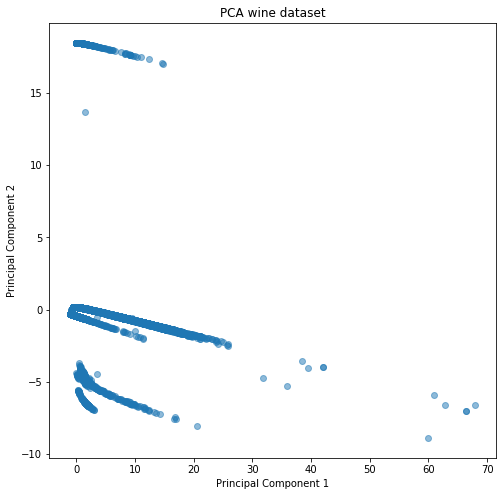

In [36]:
fig = plt.figure(figsize = (8,8))
plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1], alpha=0.5)
plt.title('PCA wine dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

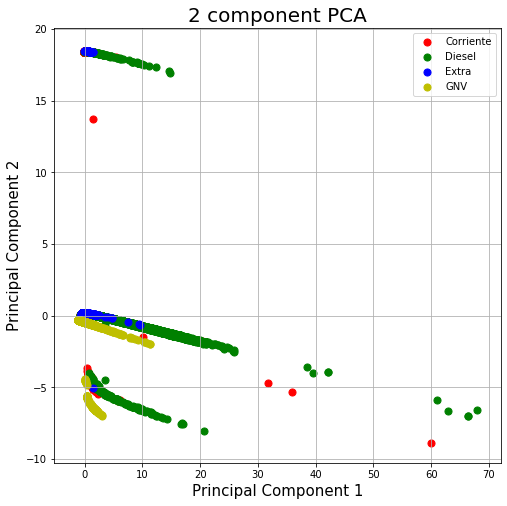

In [38]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Corriente', 'Diesel', 'Extra', 'GNV']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['F_TipoCombustible__c'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [40]:
def zscore_custom(x):
    y = (x - np.mean(x)) / np.std(x)
    return(x)

In [39]:
standarized_dataset = pd.DataFrame(x, columns = features)

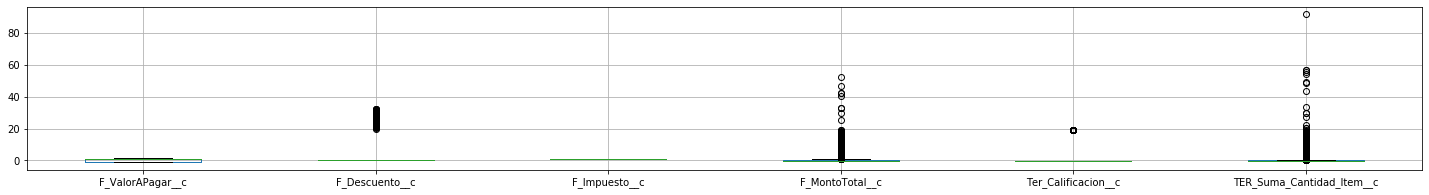

In [41]:
%matplotlib inline
standarized_dataset.boxplot(figsize=(25,3))

In [83]:
round(standarized_dataset.describe(),2)

,F_ValorAPagar__c,F_Descuento__c,F_Impuesto__c,F_MontoTotal__c,Ter_Calificacion__c,TER_Suma_Cantidad_Item__c,F_ValorAPagar__c2,F_Descuento__c2,F_Impuesto__c2,F_MontoTotal__c2,Ter_Calificacion__c2
count,493033.00,493033.00,493033.0,493033.00,493033.00,493033.00,493033.00,493033.0,493033.0,493033.00,493033.0
mean,-0.00,0.00,1.0,0.00,-0.00,-0.00,1.75,3.0,3.0,1.50,3.0
std,1.00,1.00,0.0,1.00,1.00,1.00,0.83,0.0,0.0,1.12,0.0
min,-1.29,-0.04,1.0,-0.47,-0.05,-0.59,1.00,3.0,3.0,0.00,3.0
25%,-1.29,-0.04,1.0,-0.39,-0.05,-0.34,1.00,3.0,3.0,1.00,3.0
50%,0.66,-0.04,1.0,-0.27,-0.05,-0.21,2.00,3.0,3.0,2.00,3.0
75%,0.80,-0.04,1.0,0.01,-0.05,-0.03,3.00,3.0,3.0,3.00,3.0
max,1.42,32.32,1.0,52.59,19.33,91.73,3.00,3.0,3.0,3.00,3.0


In [ ]:
print("Q2 quantile of arr : ", np.quantile(arr, .50))
print("Q1 quantile of arr : ", np.quantile(arr, .25))
print("Q3 quantile of arr : ", np.quantile(arr, .75)

In [50]:
standarized_dataset["F_ValorAPagar__c2"] = quanitle_categorization(standarized_dataset.F_ValorAPagar__c)
standarized_dataset["F_Descuento__c2"] = quanitle_categorization(standarized_dataset.F_Descuento__c)
standarized_dataset["F_Impuesto__c2"] = quanitle_categorization(standarized_dataset.F_Impuesto__c)
standarized_dataset["F_MontoTotal__c2"] = quanitle_categorization(standarized_dataset.F_MontoTotal__c)
standarized_dataset["Ter_Calificacion__c2"] = quanitle_categorization(standarized_dataset.Ter_Calificacion__c)

In [51]:
standarized_dataset2 = pd.concat([standarized_dataset, df[["Segmento_EDS__c", "Regional_PDV__c"]]]) 

In [53]:
standarized_dataset2 = standarized_dataset2.loc[:,['F_ValorAPagar__c2', 'F_Descuento__c2', 'F_Impuesto__c2',
       'F_MontoTotal__c2', 'Ter_Calificacion__c2', 'Segmento_EDS__c',
       'Regional_PDV__c']].copy()

In [47]:
def quanitle_categorization(x):
    q1 = np.quantile(x, .25)
    q2 = np.quantile(x, .5)
    q3 = np.quantile(x, .75)
    y = np.zeros(len(x))
    for i in range(0, len(x)):
        if x[i] < q1:
            y[i] = 0
        if x[i] < q2 and x[i] >= q1:
            y[i] = 1    
        if x[i] < q3 and x[i] >= q2:
            y[i] = 2
        if x[i] >= q3:
            y[i] = 3
    return y

In [54]:
def similarity_calc(matrix):
    S = np.zeros( (matrix.shape[0],matrix.shape[0]) )
    for i in range(0, matrix.shape[0]-1):
        for j in range(i, matrix.shape[0]):
            S[i,j] = np.mean( ( matrix[i,:] == matrix[j,:] ).astype(int) )
    return S

In [55]:
def entropy_comp(S):
    suma = 0
    for i in range(0, S.shape[0]-1):
        for j in range(i, S.shape[0]):
            if S[i,j] == 0 or S[i,j] == 1:
                suma += 0
            else:
                suma += - (S[i,j] * np.log(S[i,j]) + (1- S[i,j]) * np.log(1-S[i,j]) )
    return suma

In [56]:
def comparisson_comp(matrix):
    S0 = similarity_calc(matrix)
    E0 = entropy_comp(S0)
    E = [ ]
    for i in range(0, matrix.shape[1]):
        matrix2 = matrix.copy()
        matrix2 = np.delete(matrix2, i,1)
        S = similarity_calc(matrix2)
        E = np.append(E,  entropy_comp(S)) 
    return E

In [57]:
def iterative_comp(matrix):
    ranking = []
    compare = comparisson_comp(matrix)
    index = np.where(compare == np.amin(compare))[0][0]
    matrix2 = matrix2 = np.delete(matrix,index,1)
    ranking = np.append(ranking, index+1)
    while matrix2.shape[1]>=2:
        compare = comparisson_comp(matrix2)
        index = np.where(compare == np.amin(compare))[0][0]
        matrix2 = matrix2 = np.delete(matrix2, index,1)
        ranking = np.append(ranking, index+1)
    return ranking

In [78]:
# Randomly sample 0.0001 x100 of your dataframe
df_percent = standarized_dataset2.sample(frac=0.0001)

In [79]:
iterative_comp(np.array(df_percent))

array([6., 6., 4., 1., 1., 1.])

In [80]:
df_percent.shape

(99, 7)

In [81]:
standarized_dataset2.columns

Index(['F_ValorAPagar__c2', 'F_Descuento__c2', 'F_Impuesto__c2',
       'F_MontoTotal__c2', 'Ter_Calificacion__c2', 'Segmento_EDS__c',
       'Regional_PDV__c'],
      dtype='object')

In [ ]:
Ranking Entropia:

7. 'Segmento_EDS__c'
6. 'Regional_PDV__c'
5. 'F_MontoTotal__c2'
4. 'F_ValorAPagar__c2'
3. 'F_Descuento__c2'
2. 'F_Impuesto__c2'
1. 'Ter_Calificacion__c2'